<a href="https://colab.research.google.com/github/junaiskv94/Airbnb_bookin_Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import uniform

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
df=pd.read_csv('/content/drive/MyDrive/pandas/Airbnb NYC 2019.csv')

**DataSet Inspection**

In [ ]:
# First look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [96]:
df.size

782320

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Missing Data**

In [98]:
# find the total missing values in each column
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.isnull().count()

id                                48895
name                              48895
host_id                           48895
host_name                         48895
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       48895
reviews_per_month                 48895
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [ ]:
total=df.isnull().sum().sort_values(ascending=False)
percent=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data

,Total,Percent
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [102]:
# Checking the unique values in neighbor hood
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# Finding  the neighborhood belongs to each neighborhood area
neighbourhood_in_neghbourhoodarea=pd.DataFrame(df.groupby('neighbourhood_group')['neighbourhood'].unique()).reset_index()

In [ ]:
neighbourhood_in_neghbourhoodarea

,neighbourhood_group,neighbourhood
0,Bronx,"[Highbridge, Clason Point, Eastchester, Kingsb..."
1,Brooklyn,"[Kensington, Clinton Hill, Bedford-Stuyvesant,..."
2,Manhattan,"[Midtown, Harlem, East Harlem, Murray Hill, He..."
3,Queens,"[Long Island City, Woodside, Flushing, Sunnysi..."
4,Staten Island,"[St. George, Tompkinsville, Emerson Hill, Shor..."


There are a total of five  different neighbourhood groups  

In [ ]:
def neighbour_count(neighbors):
  return len(neighbors)

In [ ]:
neighbourhood_in_neghbourhoodarea['number of neighbourhood']=neighbourhood_in_neghbourhoodarea['neighbourhood'].apply(neighbour_count)

In [ ]:
neighbourhood_in_neghbourhoodarea

,neighbourhood_group,neighbourhood,number of neighbourhood
0,Bronx,"[Highbridge, Clason Point, Eastchester, Kingsb...",48
1,Brooklyn,"[Kensington, Clinton Hill, Bedford-Stuyvesant,...",47
2,Manhattan,"[Midtown, Harlem, East Harlem, Murray Hill, He...",32
3,Queens,"[Long Island City, Woodside, Flushing, Sunnysi...",51
4,Staten Island,"[St. George, Tompkinsville, Emerson Hill, Shor...",43


In [ ]:
# Finding the total hosts in each neighborhood
area_host_rel=df.groupby('neighbourhood_group')['host_id'].count().reset_index().rename({'host_id':'host_number'},axis='columns')

In [ ]:
area_host_rel

,neighbourhood_group,host_number
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


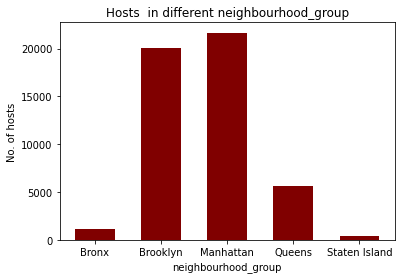

In [ ]:
plt.bar(area_host_rel['neighbourhood_group'],area_host_rel['host_number'], color ='maroon', width = 0.6)
plt.xlabel("neighbourhood_group")
plt.ylabel("No. of hosts")
plt.title("Hosts  in different neighbourhood_group")
plt.show()

([<matplotlib.patches.Wedge at 0x7f6141f6f390>,
 [Text(1.097298498667151, 0.07704547243554677, 'Bronx'),
  Text(0.15227771312965807, 1.0894087837373085, 'Brooklyn'),
  Text(-0.6183764501497931, -0.9097310404180681, 'Manhattan'),
  Text(1.0079616011872188, -0.44046953417018325, 'Queens'),
  Text(1.0996841146061016, -0.026359971225222757, 'Staten Island')],
 [Text(0.5985264538184459, 0.04202480314666187, '2.23%'),
  Text(0.0830605707979953, 0.5942229729476227, '41.12%'),
  Text(-0.33729624553625076, -0.496216931137128, '44.30%'),
  Text(0.5497972370112102, -0.24025610954737264, '11.59%'),
  Text(0.5998276988760554, -0.014378166122848774, '0.76%')])

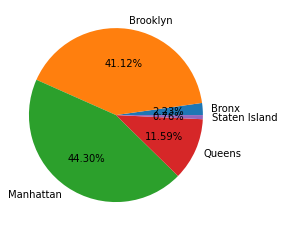

In [ ]:
plt.pie(area_host_rel['host_number'], labels = area_host_rel['neighbourhood_group'], autopct='%1.2f%%')

The Manhattana and Brookyln are the neighbourhood groups which  has most number of hosts of host and Staten Island has least number of hosts 

In [ ]:
place_price_range=df.groupby('neighbourhood_group')['price'].mean().reset_index()

In [ ]:
place_price_range

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


In [104]:
place_neibour_price_range=df.groupby('neighbourhood')['price'].mean().reset_index().sort_values(by='price',ascending=False)
place_neibour_price_range.set_index('neighbourhood',inplace=True)

In [89]:
neighbourhoods_highprice=place_neibour_price_range.head(30)
neighbourhoods_lower_price=place_neibour_price_range.tail(30)

In [ ]:
place_neibour_price_range.describe()

In [87]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rcParams["figure.figsize"] = [10, 6]

Text(0.5, 0, 'Avg_price')

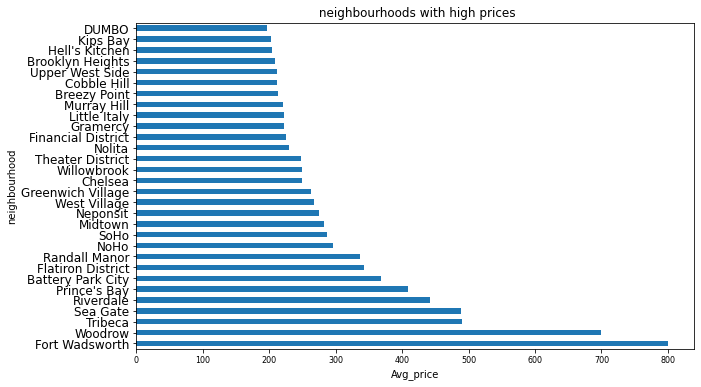

In [90]:
# neighbour hood with having high price
neighbourhoods_highprice['price'].plot(kind="barh",width = 0.5)
plt.title(" neighbourhoods with high prices")
plt.ylabel("neighbourhood")
plt.xlabel("Avg_price")

Text(0.5, 0, 'Avg_price')

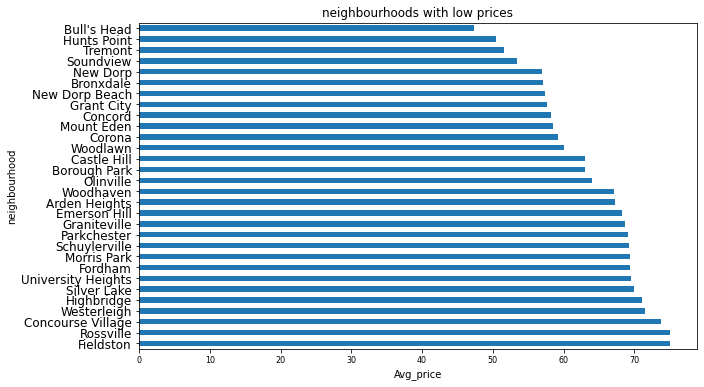

In [92]:
neighbourhoods_lower_price['price'].plot(kind="barh",width = 0.5)
plt.title("neighbourhoods with low prices")
plt.ylabel("neighbourhood")
plt.xlabel("Avg_price")

In [109]:
place_neibour_price_range.describe()

,price
count,221.000000
mean,133.248493
std,94.530766
min,47.333333
25%,81.730769
50%,101.800000
75%,152.714286
max,800.000000


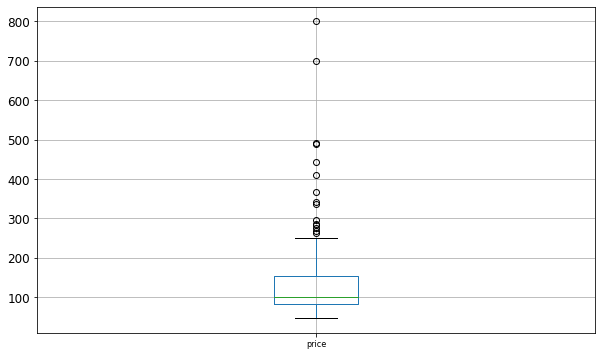

In [95]:
boxplot = place_neibour_price_range.boxplot(column=['price'])

In [ ]:
place_neibour_price_range.shape

(221, 2)

In [ ]:
mine=df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
mine=mine.sort_values(by=['neighbourhood_group','price'],ascending = (True,False))

In [ ]:
mine

,neighbourhood_group,neighbourhood,price
34,Bronx,Riverdale,442.090909
5,Bronx,City Island,173.000000
37,Bronx,Spuyten Duyvil,154.750000
12,Bronx,Eastchester,141.692308
40,Bronx,Unionport,137.142857
...,...,...,...
184,Staten Island,Concord,58.192308
190,Staten Island,Grant City,57.666667
200,Staten Island,New Dorp Beach,57.400000
199,Staten Island,New Dorp,57.000000


In [ ]:
mine=mine.pivot_table('price',['neighbourhood_group','neighbourhood'])

In [ ]:
mine

price
neighbourhood_group neighbourhood            
Bronx               Allerton        87.595238
                    Baychester      75.428571
                    Belmont         77.125000
                    Bronxdale       57.105263
                    Castle Hill     63.000000
...                                       ...
Staten Island       Tottenville    144.857143
                    West Brighton   80.555556
                    Westerleigh     71.500000
                    Willowbrook    249.000000
                    Woodrow        700.000000

[221 rows x 1 columns]

In [ ]:
mine2=mine.sort_values(by=['price'],ascending=False)

In [ ]:
neighbor_price=df.groupby('neighbourhood')['price'].mean().reset_index()
# plt.bar(mine2['neighbourhood'],mine2['price'], color ='maroon', width = 0.6)

In [ ]:
neighbor_price.sort_values(by=['price'],ascending=False,inplace=True)